In [6]:
'''
original source: https://flothesof.github.io/gameboy-sounds-in-python.html

It generates pretty good chiptune sound, although the author did not use midi file

Note: The "Audio" only works properly on jupyterLab or jupyterHub
'''

%matplotlib inline
from pylab import *
import IPython
from IPython.display import Audio
from scipy.signal import square


In [7]:
t = arange(0, 0.1, 1/10000.)
t.shape

(1000,)

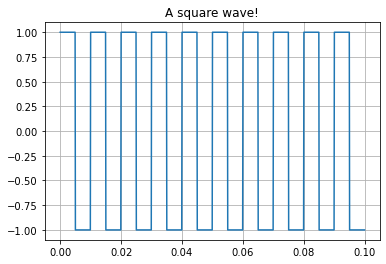

In [8]:
plot(t, square(2 * pi * 100 * t))
title("A square wave!")
ylim(-1.1, 1.1)
grid(True)

In [14]:
Audio(data=square(2 * pi * 100 * t), rate=5000) 

In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

def play_square_sound(freq, duration, duty_cycle = 0.5, sample_freq=10.e3, plot_signal=False):
    t = arange(0, duration, 1/sample_freq)
    s = square(2 * pi * freq * t, duty=duty_cycle)
    if plot_signal: 
        plot(t, s)
    display(Audio(s, rate=sample_freq))

In [11]:
interact(play_square_sound,
         freq=(10, 1000, 50),
         duration=(0.1, 2.0, 0.1),
         duty_cycle=(0.1, 0.9, 0.01),
         sample_freq=fixed(10e3),
         plot_signal=fixed(True))

interactive(children=(IntSlider(value=460, description='freq', max=1000, min=10, step=50), FloatSlider(value=1…

<function __main__.play_square_sound(freq, duration, duty_cycle=0.5, sample_freq=10000.0, plot_signal=False)>

In [28]:
def play_square_sound_with_envelope(freq, duration, duty_cycle = 0.5, sample_freq=10.e3, envelope_duration=0.1):
    t = arange(0, duration, 1/sample_freq)
    s = square(2 * pi * freq * t, duty=duty_cycle) * (1 - exp(-t * envelope_duration))
    plot(t, s)
    display(Audio(s, rate=sample_freq))

interact(play_square_sound_with_envelope,
     freq=(10, 1000, 50),
     duration=(0.1, 3.0, 0.1),
     duty_cycle=(0.1, 0.9, 0.01),
     sample_freq=fixed(10e3),
     envelope_duration=(0.1, 100, 0.1))

interactive(children=(IntSlider(value=460, description='freq', max=1000, min=10, step=50), FloatSlider(value=1…

<function __main__.play_square_sound_with_envelope(freq, duration, duty_cycle=0.5, sample_freq=10000.0, envelope_duration=0.1)>

In [15]:
tetris = "e6,8b,8c6,8d6,16e6,16d6,8c6,8b,a,8a,8c6,e6,8d6,8c6,b,8b,8c6,d6,e6,c6,a,2a,8p,d6,8f6,a6,8g6,8f6,e6,8e6,8c6,e6,8d6,8c6,b,8b,8c6,d6,e6,c6,a,a"


In [16]:
note = tetris.split(",")[2]
note

'8c6'

In [17]:
import re
duration = re.compile("^[0-9]+")
pitch = re.compile("[\D]+[\d]*")

In [19]:

print (duration.findall(note))
print (pitch.findall(note))

['8']
['c6']


In [20]:
t_max = duration.findall(note)
t_max = 1/float(t_max[0])
t_max

0.125

In [21]:
pitch.findall(note)[0].split("123456")


['c6']

In [23]:
try:
    octave = ["1", "2", "3", "4", "5", "6", "7"].index(pitch.findall(note)[0][-1]) + 1 
    height = pitch.findall(note)[0][:-1]
except:
    height = pitch.findall(note)[0]
    octave = 4
print ("height= {0}, octave= {1}".format(height, octave))

height= c, octave= 6


In [24]:
freq = 440 * 2 ** ((["a", "a#", "b", "c", "c#", "d", "d#", "e", "f", "f#", "g", "g#"].index(height) / 12. + octave - 5)) 
freq

1046.5022612023945

In [25]:
wave = play_square_sound(freq, 4 * t_max)


In [30]:
def play_melody(melody, sample_freq=10.e3, bpm=50):
    duration = re.compile("^[0-9]+")
    pitch = re.compile("[\D]+[\d]*") 
    measure_duration = 4 * 60. / bpm #usually it's 4/4 measures
    output = zeros((0,))
    for note in melody.split(','):
        # regexp matching
        duration_match = duration.findall(note)
        pitch_match = pitch.findall(note)
        
        # duration 
        if len(duration_match) == 0:
            t_max = 1/4.
        else:
            t_max = 1/float(duration_match[0])
        if "." in pitch_match[0]:
            t_max *= 1.5
            pitch_match[0] = "".join(pitch_match[0].split("."))
        t_max = t_max * measure_duration
        
        # pitch
        if pitch_match[0] == 'p':
            freq = 0
        else:
            if pitch_match[0][-1] in ["4", "5", "6", "7"]: # octave is known
                octave = ["4", "5", "6", "7"].index(pitch_match[0][-1]) + 4 
                height = pitch_match[0][:-1]
            else: # octave is not known
                octave = 5
                height = pitch_match[0]
            freq = 261.626 * 2 ** ((["c", "c#", "d", "d#", "e", "f", "f#", "g", "g#", "a", "a#", "b"].index(height) / 12. + octave - 4))  
            
        # generate sound
        t = arange(0, t_max, 1/sample_freq)
        wave = square(2 * pi * freq * t)
        
        # append to output
        output = hstack((output, wave))
    
    display(Audio(output, rate=sample_freq)) 

In [39]:
play_melody(tetris, sample_freq=20.e3, bpm=160)